In [1]:
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn import preprocessing

In [2]:
calories=pd.read_csv(r"D:\calories.csv")

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data=pd.read_csv(r"D:\exercise.csv")

In [5]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
exercise_data.User_ID.unique().shape

(15000,)

In [7]:
calories_data=pd.concat([exercise_data, calories['Calories']], axis=1)

In [8]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
calories_data.shape

(15000, 9)

In [10]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [13]:
sb.set()

<Axes: xlabel='Gender', ylabel='count'>

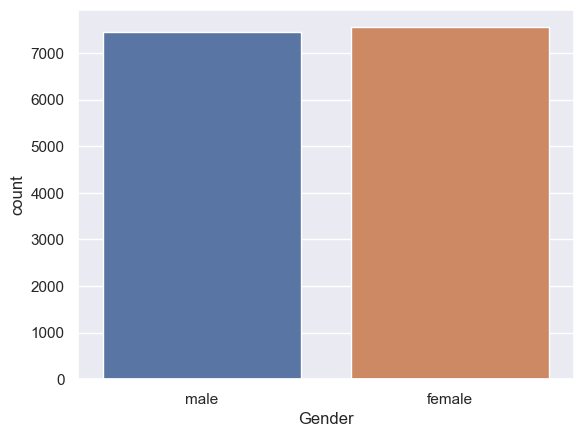

In [14]:
sb.countplot(x ='Gender', data = calories_data)

C:\Users\DEEPIKA NUTHI\AppData\Local\Temp\ipykernel_427252\2623020218.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

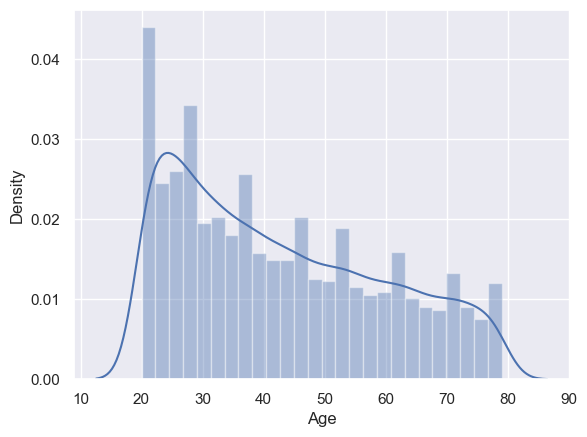

In [15]:
sb.distplot(calories_data['Age'])

C:\Users\DEEPIKA NUTHI\AppData\Local\Temp\ipykernel_427252\40868090.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

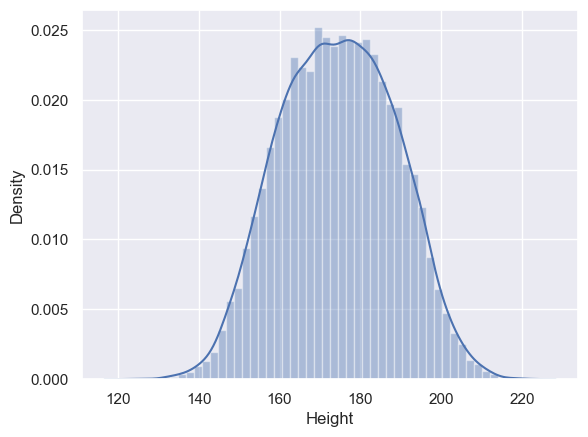

In [16]:
sb.distplot(calories_data['Height'])

C:\Users\DEEPIKA NUTHI\AppData\Local\Temp\ipykernel_427252\3644993217.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

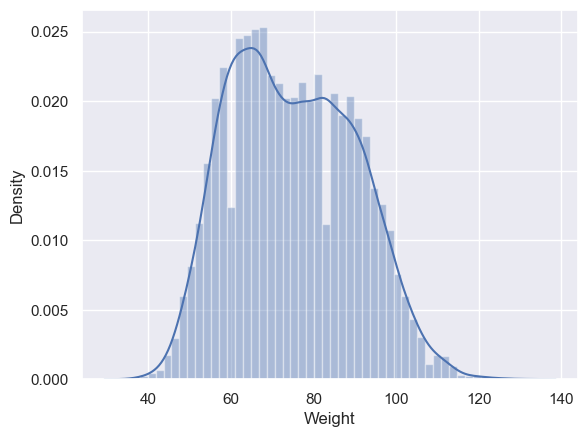

In [17]:
sb.distplot(calories_data['Weight'])

In [18]:
correlation=calories_data.corr()

C:\Users\DEEPIKA NUTHI\AppData\Local\Temp\ipykernel_427252\3605353256.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=calories_data.corr()


<Axes: >

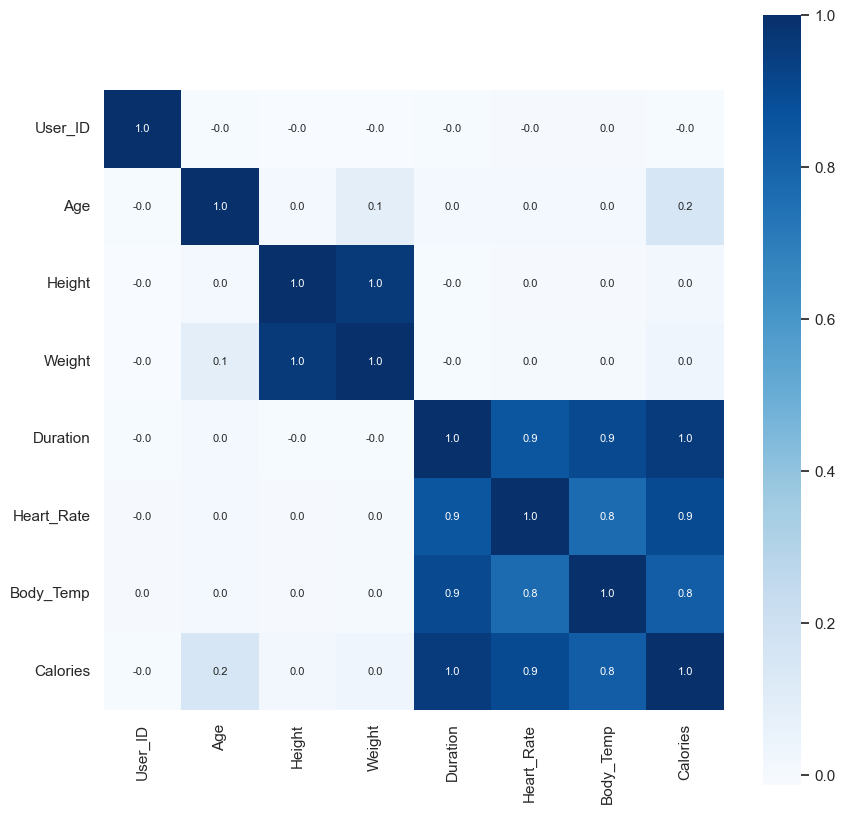

In [19]:
plt.figure(figsize=(10,10))
sb.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [20]:
calories_data.replace({"Gender":{"male":0,"female":1}}, inplace=True)

In [21]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [22]:
X=calories_data.drop(columns=['User_ID', 'Calories'], axis=1) 
Y=calories_data['Calories']

In [23]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [24]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape, Y_test.shape)

(15000, 7) (12000, 7) (3000, 7) (3000,)


In [30]:
linear_model=LinearRegression() 
linear_model.fit(X_train,Y_train)

LinearRegression()

In [31]:
dtr_model=DecisionTreeRegressor() 
dtr_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [32]:
rfr_model=RandomForestRegressor() 
rfr_model.fit(X_train,Y_train)

RandomForestRegressor()

In [33]:
xgb_model=XGBRegressor() 
xgb_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [34]:
svr_model=SVR() 
svr_model.fit(X_train,Y_train)

SVR()

In [35]:
y_pred1=linear_model.predict(X_test)
y_pred2=dtr_model.predict(X_test) 
y_pred3=rfr_model.predict(X_test)
y_pred4=xgb_model.predict(X_test)
y_pred5=svr_model.predict(X_test)

Linear Regressor
Decision Tree Regressor
Random Forest Regressor
XGB Regressor
Support Vector Machine


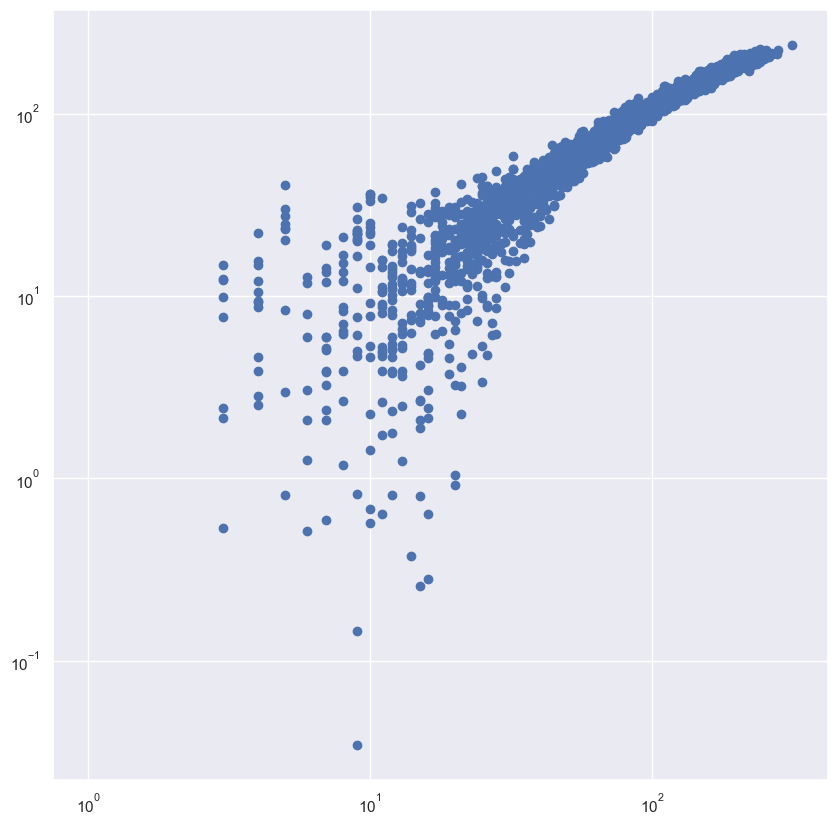

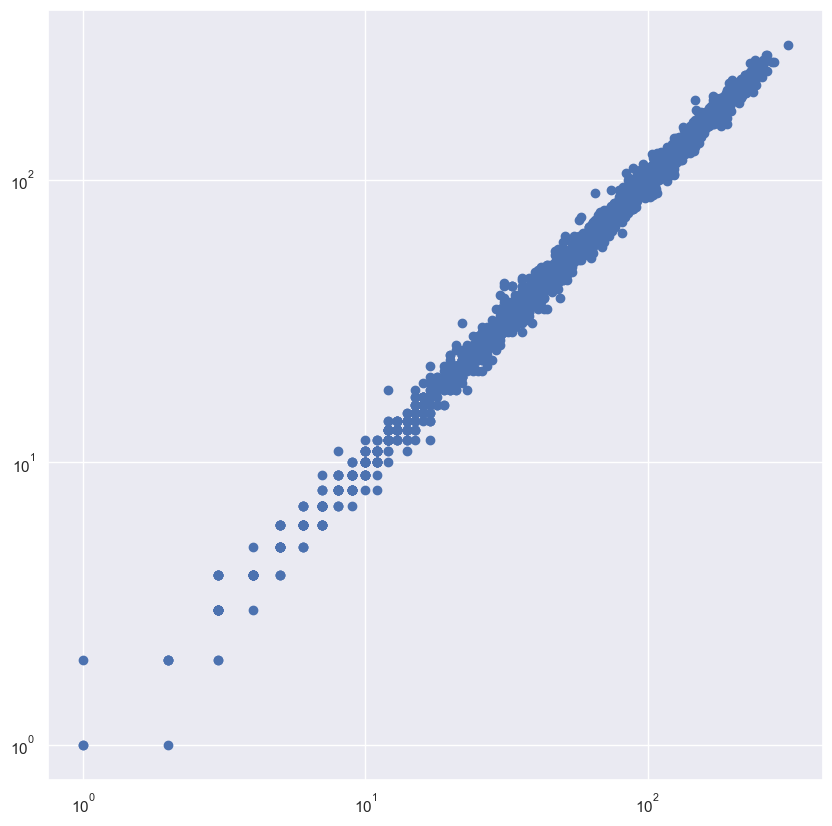

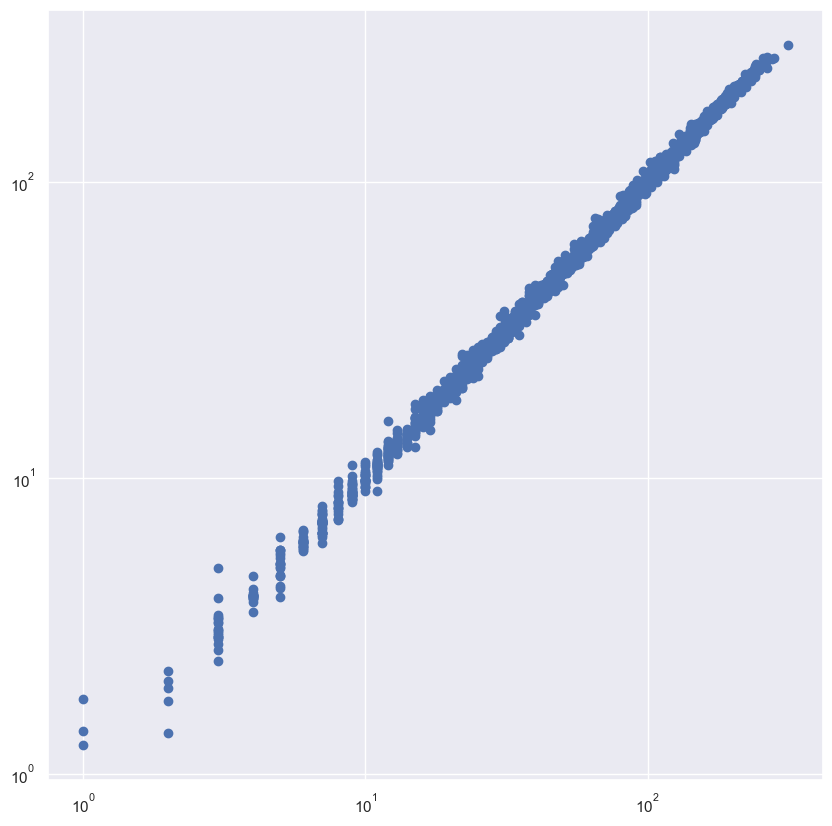

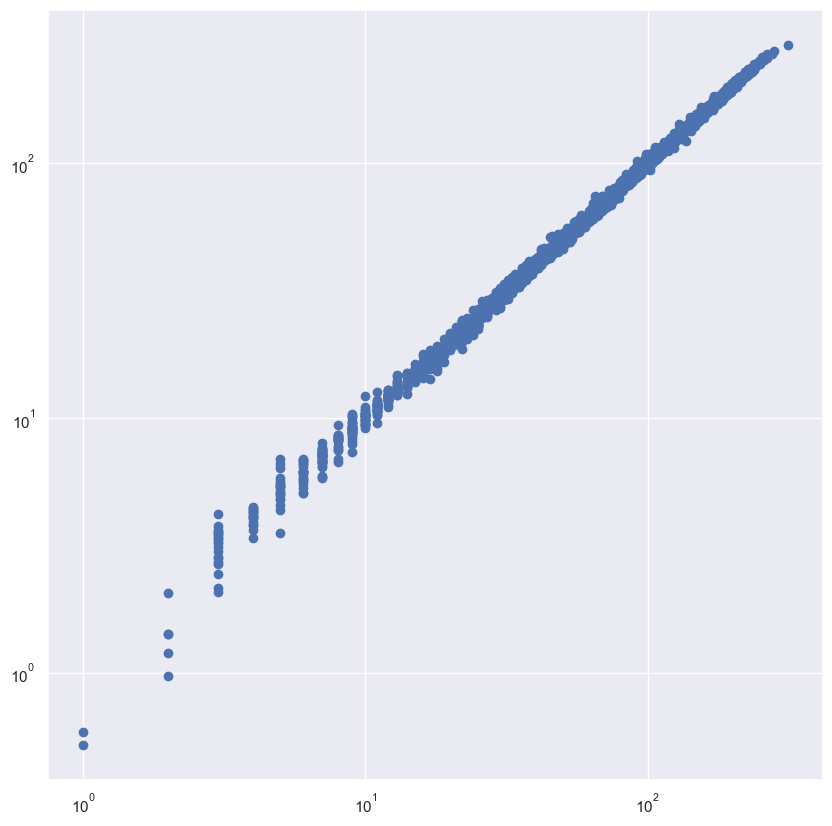

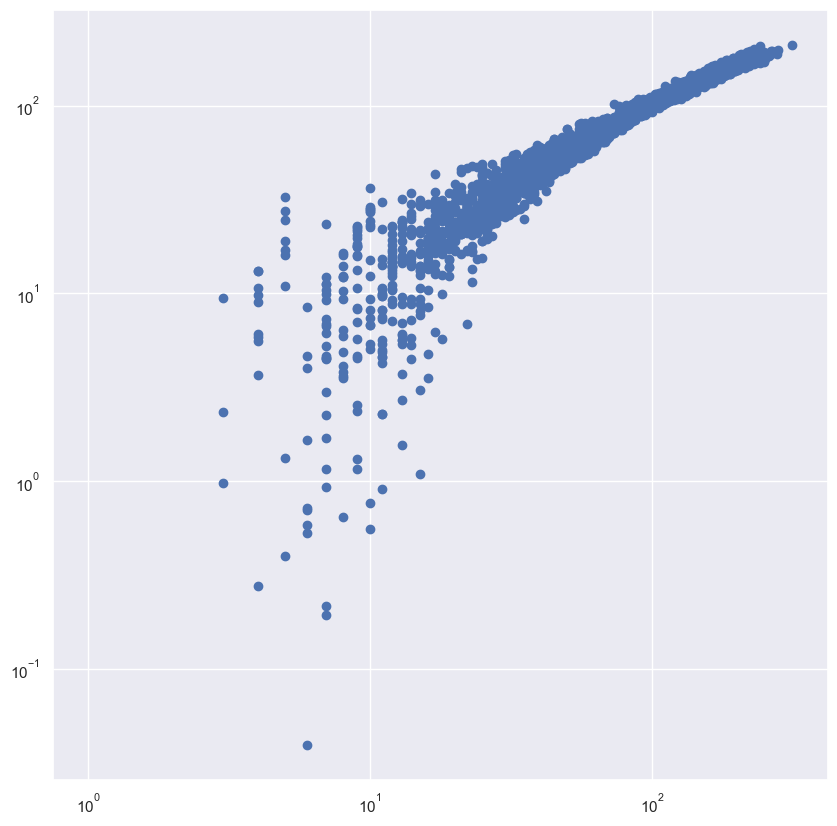

In [37]:
a=[y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]
b=["Linear Regressor", "Decision Tree Regressor", "Random Forest Regressor", "XGB Regressor", "Support Vector Machine"]
for i in range(0,5):
    print(b[i])
    plt.figure(figsize=(10,10))
    plt.scatter(Y_test,a[i])
    plt.yscale('log') 
    plt.xscale('log')

Linear Regressor


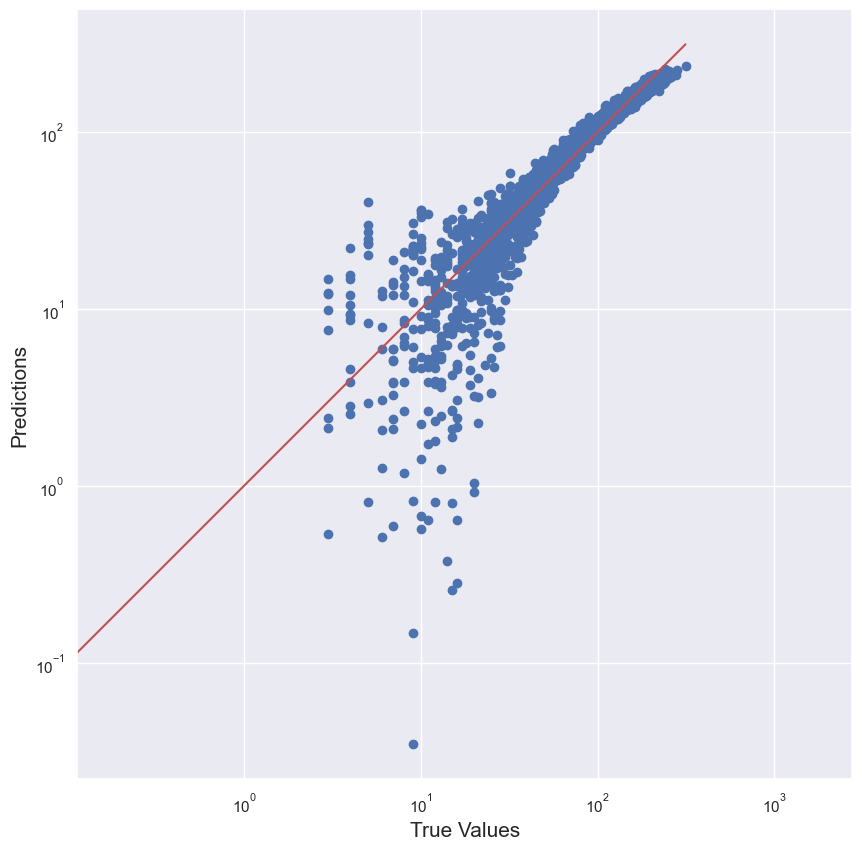

Decision Tree Regressor


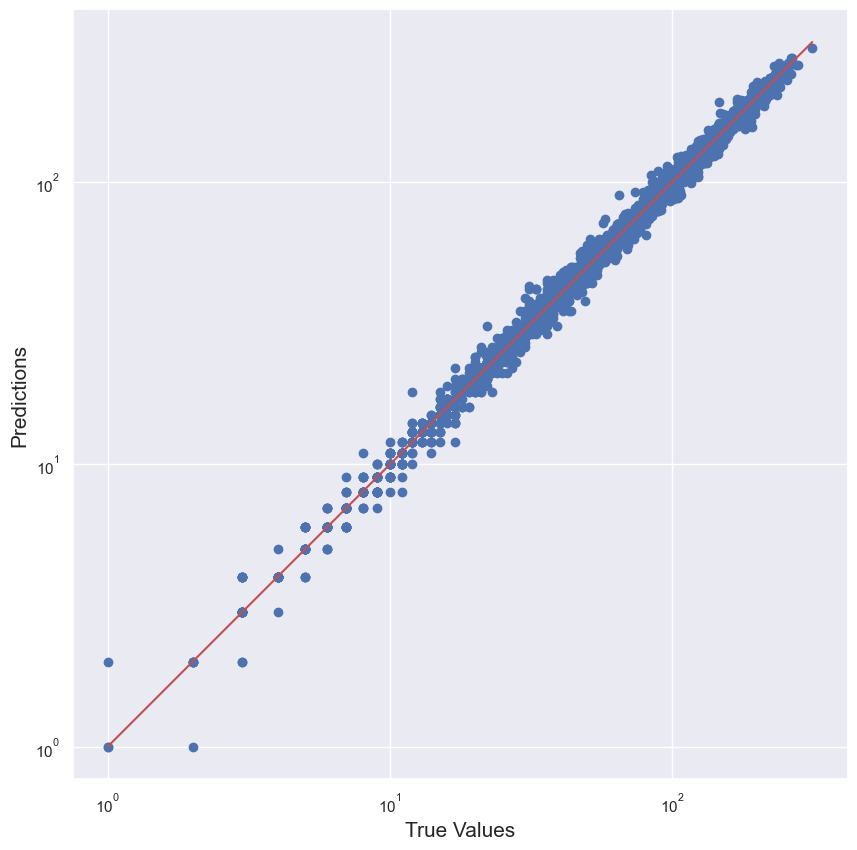

Random Forest Regressor


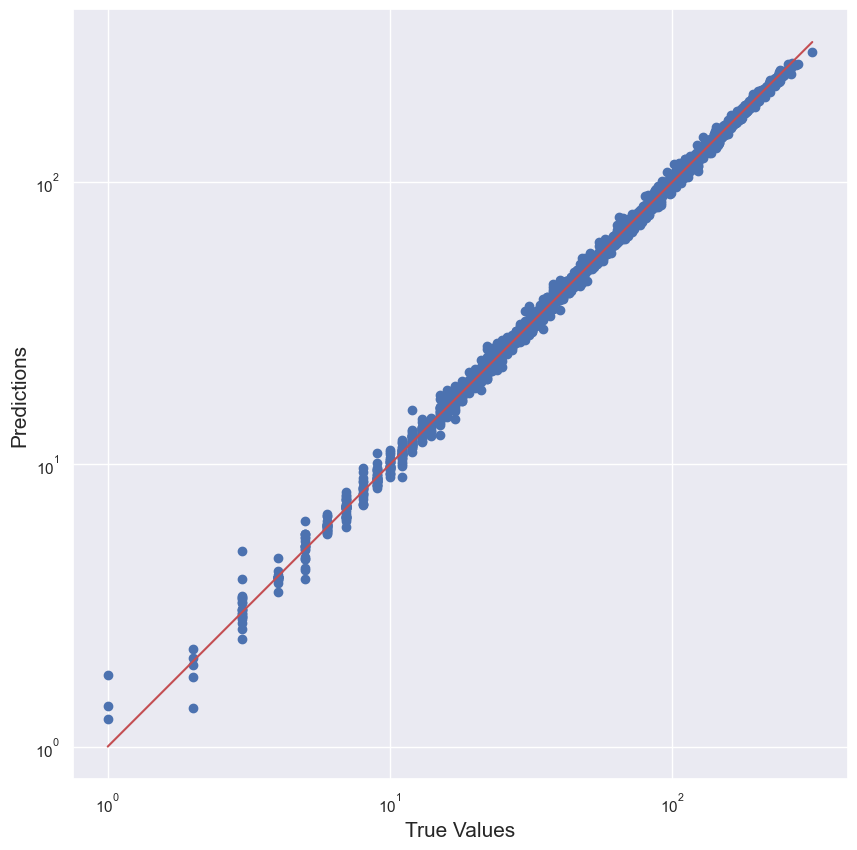

XGB Regressor


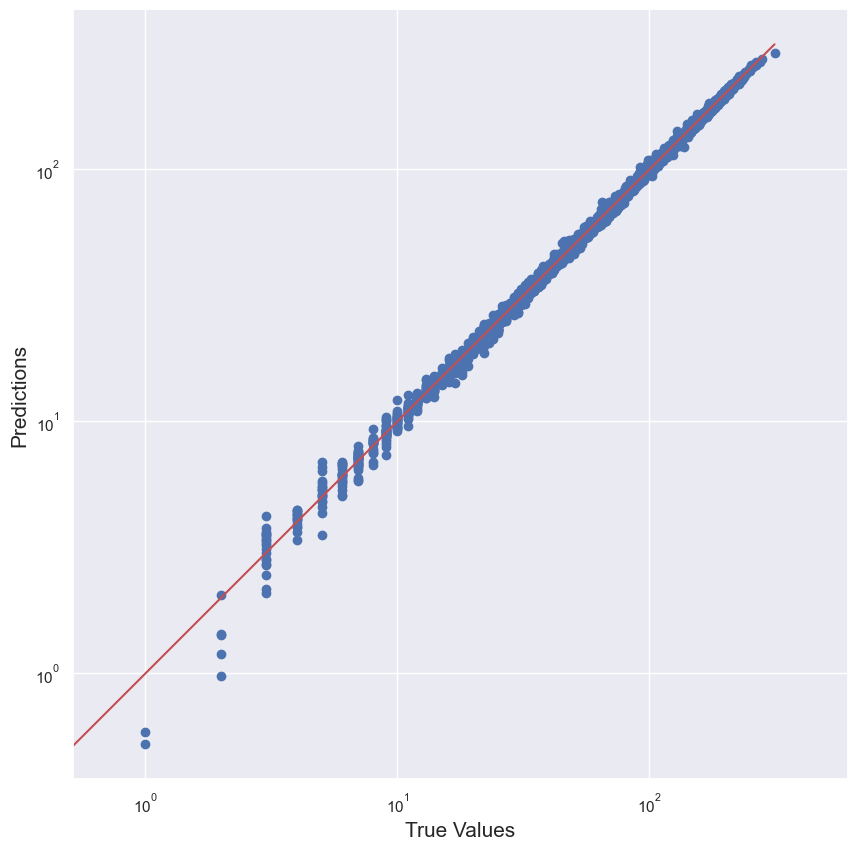

SVM Regressor


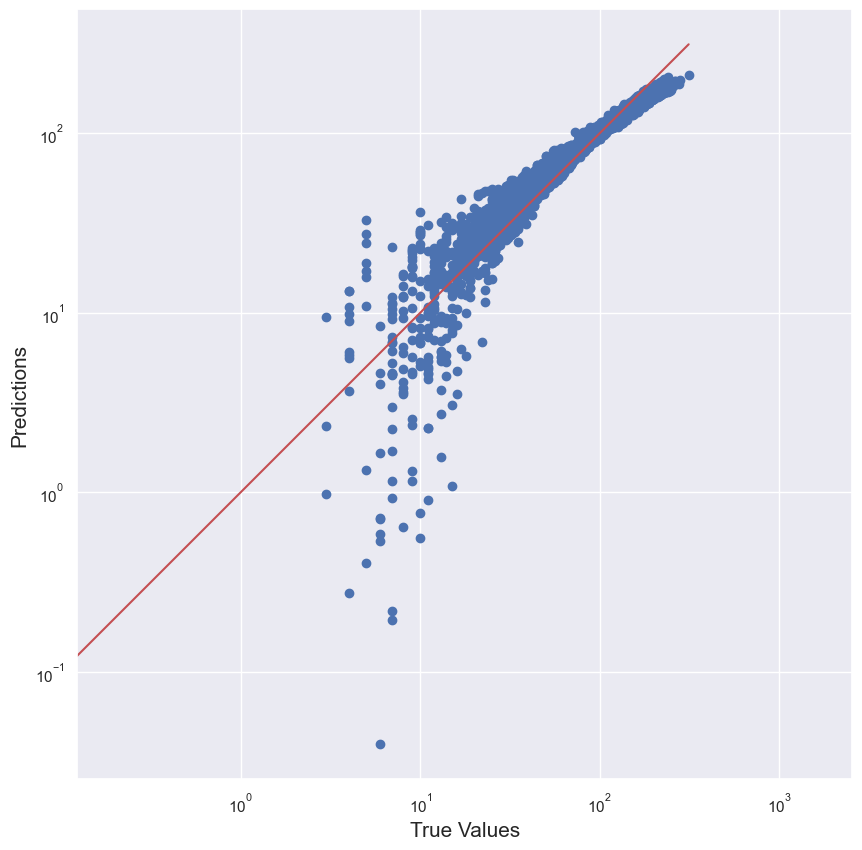

In [41]:
a=[y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]
b=["Linear Regressor", "Decision Tree Regressor", "Random Forest Regressor", "XGB Regressor","SVM Regressor"]
for i in range(0,5):
    print(b[i])
    plt.figure(figsize=(10,10)) 
    plt.scatter(Y_test,a[i])
    plt.yscale('log')
    plt.xscale('log')
    p1=max(max(Y_test),max(a[i])) 
    p2=min(min(Y_test),min(a[i]))
    plt.plot([p1,p2],[p1,p2], 'r-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15) 
    plt.axis('equal')
    plt.show()

In [44]:
mae1=metrics.mean_absolute_error(Y_test, y_pred1)
mae2=metrics.mean_absolute_error(Y_test, y_pred2)
mae3=metrics.mean_absolute_error(Y_test, y_pred3)
mae4=metrics.mean_absolute_error(Y_test, y_pred4)
mae5=metrics.mean_absolute_error(Y_test, y_pred5)

In [45]:
list1=[mae1,mae2,mae3,mae4,mae5]
mae=np.array(list1)
print("Mean Absolute Errors = ", mae)

Mean Absolute Errors =  [ 8.38518805  3.394       1.70400333  1.48070488 10.62061436]


In [46]:
rmse1= np.sqrt(metrics.mean_squared_error(Y_test, y_pred1))
rmse2= np.sqrt(metrics.mean_squared_error(Y_test, y_pred2))
rmse3= np.sqrt(metrics.mean_squared_error(Y_test, y_pred3))
rmse4= np.sqrt(metrics.mean_squared_error(Y_test, y_pred4))
rmse5= np.sqrt(metrics.mean_squared_error(Y_test, y_pred5))

In [47]:
list2=[rmse1, rmse2, rmse3, rmse4, rmse5] 
rmse=np.array(list2)
print("RMSE = ", rmse)

RMSE =  [11.40557205  5.30729058  2.67673862  2.12938076 15.5978557 ]


In [48]:
r2_1= metrics.r2_score(Y_test, y_pred1)
r2_2= metrics.r2_score(Y_test, y_pred2)
r2_3= metrics.r2_score(Y_test, y_pred3)
r2_4= metrics.r2_score(Y_test, y_pred4)
r2_5= metrics.r2_score(Y_test, y_pred5)

In [50]:
list3=[r2_1, r2_2, r2_3,r2_4, r2_5]
r2= np.array(list3)
print("R2 = ",r2)

R2 =  [0.96687904 0.99282843 0.99817577 0.99884555 0.93805609]


In [51]:
n=15000
k=7
list4=[]
for i in r2:
    t=1-((1-1)* (n-1)/(n-k-1)) 
    list4.append(t)
adj_r2=np.array(list4)
print("Adjusted r2 = ",adj_r2)

Adjusted r2 =  [1. 1. 1. 1. 1.]


In [54]:
data=np.array([list1, list2, list3, list4]) 
index_val=["MAE", "RMSE", "R2", "Adj R2"]
col_val=["Linear Reg", "Decision Tree", "Random Forest", "XGB Reg", "SVM"] 
df=pd.DataFrame(data, index=index_val,columns=col_val)
print(df)

        Linear Reg  Decision Tree  Random Forest   XGB Reg        SVM
MAE       8.385188       3.394000       1.704003  1.480705  10.620614
RMSE     11.405572       5.307291       2.676739  2.129381  15.597856
R2        0.966879       0.992828       0.998176  0.998846   0.938056
Adj R2    1.000000       1.000000       1.000000  1.000000   1.000000
